## Get data about Paris neighborhoods

Le quartier désigne la division administrative de l’arrondissement. Chaque arrondissement est découpé
en quatre quartiers administratifs. Paris compte ainsi quatre-vingt quartiers administratifs.

### Import libraries

In [1]:
import pandas as pd
print('Pandas library imported.')
import requests
print('Requests library imported.')
from bs4 import BeautifulSoup
print('BeautifulSoup library imported.')

print('All libraries imported.')

Pandas library imported.
Requests library imported.
BeautifulSoup library imported.
All libraries imported.


### Get the data about neighborhoods of Paris

Get a csv from the site of the City of Paris: https://opendata.paris.fr/explore/dataset/quartier_paris/export/

In [2]:
!wget --quiet https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=csv -O paris_neighborhoods.csv

print('CSV file downloaded!')

CSV file downloaded!


In [3]:
paris_neighborhoods = pd.read_csv('paris_neighborhoods.csv', sep=';')

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))

print('The five first rows are:')
paris_neighborhoods.head()

The dataframe shape is (80, 10).
The five first rows are:


,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geom_x_y,geom
0,750000021,21,7510601,Monnaie,6,750000006,2391.122818,2.933606e+05,"48.8543844036,2.34003537113","{""type"": ""Polygon"", ""coordinates"": [[[2.343168..."
1,750000022,22,7510602,Odéon,6,750000006,3516.314464,7.161484e+05,"48.8478006293,2.33633882759","{""type"": ""Polygon"", ""coordinates"": [[[2.336988..."
2,750000029,29,7510801,Champs-Elysées,8,750000008,5480.652870,1.140254e+06,"48.8670744922,2.30865168468","{""type"": ""Polygon"", ""coordinates"": [[[2.306463..."
3,750000051,51,7511303,Maison-Blanche,13,750000013,6814.373288,2.231506e+06,"48.8231278057,2.35243314954","{""type"": ""Polygon"", ""coordinates"": [[[2.349115..."
4,750000052,52,7511304,Croulebarbe,13,750000013,3289.230480,6.920677e+05,"48.8337336761,2.34767304607","{""type"": ""Polygon"", ""coordinates"": [[[2.351662..."


### Cleaning the dataframe

Drop the columns we will not use

In [4]:
paris_neighborhoods.drop(['n_sq_qu', 'geom', 'n_sq_ar'], axis='columns', inplace=True)

paris_neighborhoods.head()

,c_qu,c_quinsee,l_qu,c_ar,perimetre,surface,geom_x_y
0,21,7510601,Monnaie,6,2391.122818,2.933606e+05,"48.8543844036,2.34003537113"
1,22,7510602,Odéon,6,3516.314464,7.161484e+05,"48.8478006293,2.33633882759"
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254e+06,"48.8670744922,2.30865168468"
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506e+06,"48.8231278057,2.35243314954"
4,52,7511304,Croulebarbe,13,3289.230480,6.920677e+05,"48.8337336761,2.34767304607"


Rename the columns

In [5]:
paris_neighborhoods.columns = ['NeighborhoodNumber', 'NeighborhoodCode', 'Neighborhood', 'DistrictNumber', 'Perimeter', 'Area', 'Coordinates']

paris_neighborhoods.head()

,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Coordinates
0,21,7510601,Monnaie,6,2391.122818,2.933606e+05,"48.8543844036,2.34003537113"
1,22,7510602,Odéon,6,3516.314464,7.161484e+05,"48.8478006293,2.33633882759"
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254e+06,"48.8670744922,2.30865168468"
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506e+06,"48.8231278057,2.35243314954"
4,52,7511304,Croulebarbe,13,3289.230480,6.920677e+05,"48.8337336761,2.34767304607"


Split the coordinates in 2 columns

In [6]:
paris_neighborhoods[['Latitude', 'Longitude']] = paris_neighborhoods.Coordinates.str.split(",", expand=True)
paris_neighborhoods.drop(['Coordinates'], axis='columns', inplace=True)

paris_neighborhoods.head()

,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude
0,21,7510601,Monnaie,6,2391.122818,2.933606e+05,48.8543844036,2.34003537113
1,22,7510602,Odéon,6,3516.314464,7.161484e+05,48.8478006293,2.33633882759
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254e+06,48.8670744922,2.30865168468
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506e+06,48.8231278057,2.35243314954
4,52,7511304,Croulebarbe,13,3289.230480,6.920677e+05,48.8337336761,2.34767304607


Convert area to square kilometers

In [7]:
paris_neighborhoods[['Area']] = paris_neighborhoods[['Area']]/1000000

paris_neighborhoods.head()

,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude
0,21,7510601,Monnaie,6,2391.122818,0.293361,48.8543844036,2.34003537113
1,22,7510602,Odéon,6,3516.314464,0.716148,48.8478006293,2.33633882759
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254,48.8670744922,2.30865168468
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506,48.8231278057,2.35243314954
4,52,7511304,Croulebarbe,13,3289.230480,0.692068,48.8337336761,2.34767304607


Get more information from Wikipedia
Scrape the wikipedia page about the neighborhoods of Paris: https://en.wikipedia.org/wiki/Quarters_of_Paris

In [8]:
result = requests.get("https://en.wikipedia.org/wiki/Quarters_of_Paris")
soup = BeautifulSoup(result.content,'lxml')
table = soup.find_all('table')[0] 
paris_neighborhoods_wikipedia = pd.read_html(str(table))[0]

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))

print('The five first rows are:')
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 6).
The five first rows are:


,Arrondissement(Districts),Quartiers(Quarters),Quartiers(Quarters).1,Population in1999[3],Area(hectares)[3],Map
0,"1st arrondissement(Called ""du Louvre"")",1st,Saint-Germain-l'Auxerrois,1672,86.9,NaN
1,"1st arrondissement(Called ""du Louvre"")",2nd,Les Halles,8984,41.2,NaN
2,"1st arrondissement(Called ""du Louvre"")",3rd,Palais-Royal,3195,27.4,NaN
3,"1st arrondissement(Called ""du Louvre"")",4th,Place-Vendôme,3044,26.9,NaN
4,"2nd arrondissement(Called ""de la Bourse"")",5th,Gaillon,1345,18.8,NaN


Drop the columns we will not use

In [9]:
paris_neighborhoods_wikipedia.drop(['Quartiers(Quarters).1', 'Area(hectares)[3]', 'Map'], axis='columns', inplace=True)

paris_neighborhoods_wikipedia.head()

,Arrondissement(Districts),Quartiers(Quarters),Population in1999[3]
0,"1st arrondissement(Called ""du Louvre"")",1st,1672
1,"1st arrondissement(Called ""du Louvre"")",2nd,8984
2,"1st arrondissement(Called ""du Louvre"")",3rd,3195
3,"1st arrondissement(Called ""du Louvre"")",4th,3044
4,"2nd arrondissement(Called ""de la Bourse"")",5th,1345


Rename the columns

In [10]:
paris_neighborhoods_wikipedia.columns = ['District', 'NeighborhoodNumber', 'Population']

paris_neighborhoods_wikipedia.head()

,District,NeighborhoodNumber,Population
0,"1st arrondissement(Called ""du Louvre"")",1st,1672
1,"1st arrondissement(Called ""du Louvre"")",2nd,8984
2,"1st arrondissement(Called ""du Louvre"")",3rd,3195
3,"1st arrondissement(Called ""du Louvre"")",4th,3044
4,"2nd arrondissement(Called ""de la Bourse"")",5th,1345


Split the district official name (number of the "arrondissement") and the "also called" named (which is not commonly used in Paris)

In [11]:
paris_neighborhoods_wikipedia[['District', 'DistrictName']] = paris_neighborhoods_wikipedia.District.str.split("(",expand=True,)

paris_neighborhoods_wikipedia.head()

,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1st,1672,"Called ""du Louvre"")"
1,1st arrondissement,2nd,8984,"Called ""du Louvre"")"
2,1st arrondissement,3rd,3195,"Called ""du Louvre"")"
3,1st arrondissement,4th,3044,"Called ""du Louvre"")"
4,2nd arrondissement,5th,1345,"Called ""de la Bourse"")"


Make the district name more beautiful

In [12]:
paris_neighborhoods_wikipedia[['DistrictName']] = paris_neighborhoods_wikipedia.DistrictName.str.replace('Called \"', 'Arrondissement ')
paris_neighborhoods_wikipedia[['DistrictName']] = paris_neighborhoods_wikipedia.DistrictName.str.replace("\"\)", '')

paris_neighborhoods_wikipedia.head()

,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1st,1672,Arrondissement du Louvre
1,1st arrondissement,2nd,8984,Arrondissement du Louvre
2,1st arrondissement,3rd,3195,Arrondissement du Louvre
3,1st arrondissement,4th,3044,Arrondissement du Louvre
4,2nd arrondissement,5th,1345,Arrondissement de la Bourse


Remove letters from the neighborhood code

In [13]:
paris_neighborhoods_wikipedia[['NeighborhoodNumber']] = paris_neighborhoods_wikipedia.NeighborhoodNumber.str[:-2]
paris_neighborhoods_wikipedia = paris_neighborhoods_wikipedia.astype({'NeighborhoodNumber': int})

paris_neighborhoods_wikipedia.head()

,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1,1672,Arrondissement du Louvre
1,1st arrondissement,2,8984,Arrondissement du Louvre
2,1st arrondissement,3,3195,Arrondissement du Louvre
3,1st arrondissement,4,3044,Arrondissement du Louvre
4,2nd arrondissement,5,1345,Arrondissement de la Bourse


In [14]:
paris_neighborhoods = pd.merge(paris_neighborhoods, paris_neighborhoods_wikipedia, on='NeighborhoodNumber')

paris_neighborhoods.head()

,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude,District,Population,DistrictName
0,21,7510601,Monnaie,6,2391.122818,0.293361,48.8543844036,2.34003537113,6th arrondissement,6185,Arrondissement du Luxembourg
1,22,7510602,Odéon,6,3516.314464,0.716148,48.8478006293,2.33633882759,6th arrondissement,8833,Arrondissement du Luxembourg
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254,48.8670744922,2.30865168468,8th arrondissement,4614,Arrondissement de l'Élysée
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506,48.8231278057,2.35243314954,13th arrondissement,64797,Arrondissement des Gobelins
4,52,7511304,Croulebarbe,13,3289.230480,0.692068,48.8337336761,2.34767304607,13th arrondissement,19526,Arrondissement des Gobelins


Add the postal code

In [15]:
paris_neighborhoods['PostalCode'] = '750' + paris_neighborhoods.District.str.split(' ').str[0].str[:-2].str.rjust(2, '0')

paris_neighborhoods.head()

,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude,District,Population,DistrictName,PostalCode
0,21,7510601,Monnaie,6,2391.122818,0.293361,48.8543844036,2.34003537113,6th arrondissement,6185,Arrondissement du Luxembourg,75006
1,22,7510602,Odéon,6,3516.314464,0.716148,48.8478006293,2.33633882759,6th arrondissement,8833,Arrondissement du Luxembourg,75006
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254,48.8670744922,2.30865168468,8th arrondissement,4614,Arrondissement de l'Élysée,75008
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506,48.8231278057,2.35243314954,13th arrondissement,64797,Arrondissement des Gobelins,75013
4,52,7511304,Croulebarbe,13,3289.230480,0.692068,48.8337336761,2.34767304607,13th arrondissement,19526,Arrondissement des Gobelins,75013


Reorganize columns

In [16]:
paris_neighborhoods = paris_neighborhoods[['NeighborhoodCode', 'NeighborhoodNumber', 'Neighborhood', 'DistrictNumber', 'District', 'DistrictName', 'PostalCode', 'Population', 'Area', 'Perimeter', 'Latitude', 'Longitude']]

paris_neighborhoods

,NeighborhoodCode,NeighborhoodNumber,Neighborhood,DistrictNumber,District,DistrictName,PostalCode,Population,Area,Perimeter,Latitude,Longitude
0,7510601,21,Monnaie,6,6th arrondissement,Arrondissement du Luxembourg,75006,6185,0.293361,2391.122818,48.8543844036,2.34003537113
1,7510602,22,Odéon,6,6th arrondissement,Arrondissement du Luxembourg,75006,8833,0.716148,3516.314464,48.8478006293,2.33633882759
2,7510801,29,Champs-Elysées,8,8th arrondissement,Arrondissement de l'Élysée,75008,4614,1.140254,5480.652870,48.8670744922,2.30865168468
3,7511303,51,Maison-Blanche,13,13th arrondissement,Arrondissement des Gobelins,75013,64797,2.231506,6814.373288,48.8231278057,2.35243314954
4,7511304,52,Croulebarbe,13,13th arrondissement,Arrondissement des Gobelins,75013,19526,0.692068,3289.230480,48.8337336761,2.34767304607
5,7511204,48,Quinze-Vingts,12,12th arrondissement,Arrondissement de Reuilly,75012,25752,1.235916,4509.486974,48.8469159441,2.37440162648
6,7511101,41,Folie-Méricourt,11,11th arrondissement,Arrondissement de Popincourt,75011,33002,0.725752,3724.352694,48.8674031901,2.37296482493
7,7511301,49,Salpêtrière,13,13th arrondissement,Arrondissement des Gobelins,75013,18246,1.181560,4759.096239,48.8374058852,2.36331863515
8,7510104,4,Place-Vendôme,1,1st arrondissement,Arrondissement du Louvre,75001,3044,0.269457,2147.817602,48.8670185906,2.32858166493
9,7511904,76,Combat,19,19th arrondissement,Arrondissement des Buttes-Chaumont,75019,38988,1.294988,4435.273252,48.8786390757,2.38012728183


Check the type of each column

In [17]:
paris_neighborhoods.dtypes

NeighborhoodCode        int64
NeighborhoodNumber      int64
Neighborhood           object
DistrictNumber          int64
District               object
DistrictName           object
PostalCode             object
Population              int64
Area                  float64
Perimeter             float64
Latitude               object
Longitude              object
dtype: object

Cast PostalCode and NeighborhoodCode columns to integer

In [18]:
paris_neighborhoods = paris_neighborhoods.astype({'PostalCode': int, 'Latitude': float, 'Longitude': float})

paris_neighborhoods.dtypes

NeighborhoodCode        int64
NeighborhoodNumber      int64
Neighborhood           object
DistrictNumber          int64
District               object
DistrictName           object
PostalCode              int64
Population              int64
Area                  float64
Perimeter             float64
Latitude              float64
Longitude             float64
dtype: object

## Some visual analysis of the neighborhoods

### Choropleth map

In [19]:
#!conda install -c conda-forge folium
import folium
print('folium installed and imported.')

print('All libraries imported.')

folium installed and imported.
All libraries imported.


In [20]:
!wget --quiet https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=geojson -O paris_neighborhoods_geo.json

print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [21]:
paris_neighborhoods_geo = r'paris_neighborhoods_geo.json'

In [22]:
paris_map = folium.Map(location=[48.866667, 2.333333], zoom_start=13, tiles='OpenStreetMap')

choropleth = folium.Choropleth(
    geo_data=paris_neighborhoods_geo,
    data=paris_neighborhoods,
    columns=['NeighborhoodCode', 'Population'],
    key_on='feature.properties.c_quinsee',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Neighborhoods of Paris by population in 1999'
).add_to(paris_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['l_qu'],labels=False)
).add_to(paris_map)

# display map
paris_map

### Scatter plot

In [23]:
import matplotlib.pyplot as plt
print('pyplot library imported.')

print('All libraries imported.')

pyplot library imported.
All libraries imported.


In [24]:
scatter_plot_df = paris_neighborhoods[['Neighborhood', 'Population', 'Area']]
scatter_plot_df.head()

,Neighborhood,Population,Area
0,Monnaie,6185,0.293361
1,Odéon,8833,0.716148
2,Champs-Elysées,4614,1.140254
3,Maison-Blanche,64797,2.231506
4,Croulebarbe,19526,0.692068


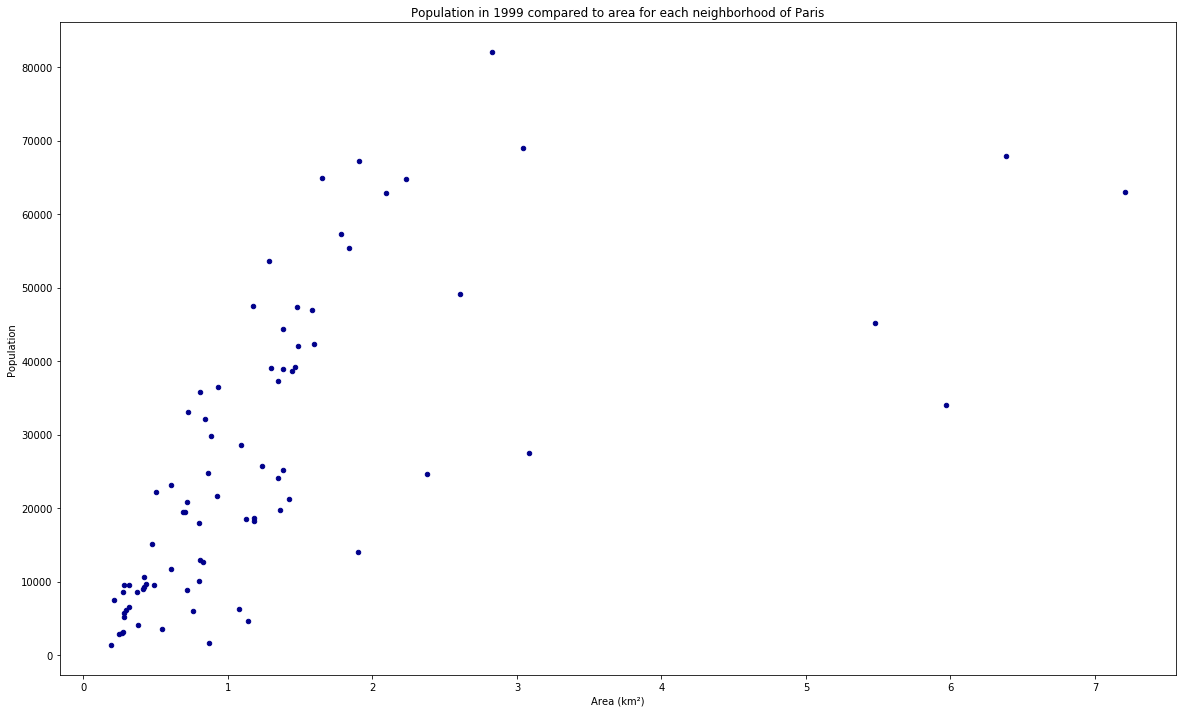

In [25]:
scatter_plot_df.plot(kind='scatter', x='Area', y='Population', figsize=(20, 12), color='darkblue')

plt.title('Population in 1999 compared to area for each neighborhood of Paris')
plt.xlabel('Area (km²)')
plt.ylabel('Population')

plt.show()

In [26]:
bar_chart_df = paris_neighborhoods[['NeighborhoodNumber', 'Neighborhood', 'DistrictNumber', 'District', 'Population', 'Area']]
bar_chart_df.set_index(['District', 'Neighborhood'], inplace=True)

bar_chart_df['Density'] = bar_chart_df['Population'] / bar_chart_df['Area']

bar_chart_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NeighborhoodNumber  DistrictNumber  \
District            Neighborhood                                         
6th arrondissement  Monnaie                         21               6   
                    Odéon                           22               6   
8th arrondissement  Champs-Elysées                  29               8   
13th arrondissement Maison-Blanche                  51              13   
                    Croulebarbe                     52              13   

                                    Population      Area       Density  
District            Neighborhood                                        
6th arrondissement  Monnaie               6185  0.293361  21083.269477  
                    Odéon                 8833  0.716148  12334.036638  
8th arrondissement  Champs-Elysées        4614  1.140254   4046.466869  
13th arrondissement Maison-Blanche       64797  2.231506  29037.343810  
                    Croulebarbe          19526  0.692068  28214.002311

In [27]:
bar_chart_neighborhood_df = bar_chart_df[['Density']].sort_values(by=['Density'], ascending=True)

bar_chart_neighborhood_df.head()

,,Density
District,Neighborhood,
1st arrondissement,Saint-Germain-l'Auxerrois,1924.049162
8th arrondissement,Champs-Elysées,4046.466869
12th arrondissement,Bel-Air,5690.244910
7th arrondissement,Invalides,5845.024327
9th arrondissement,Chaussée-d'Antin,6418.358062


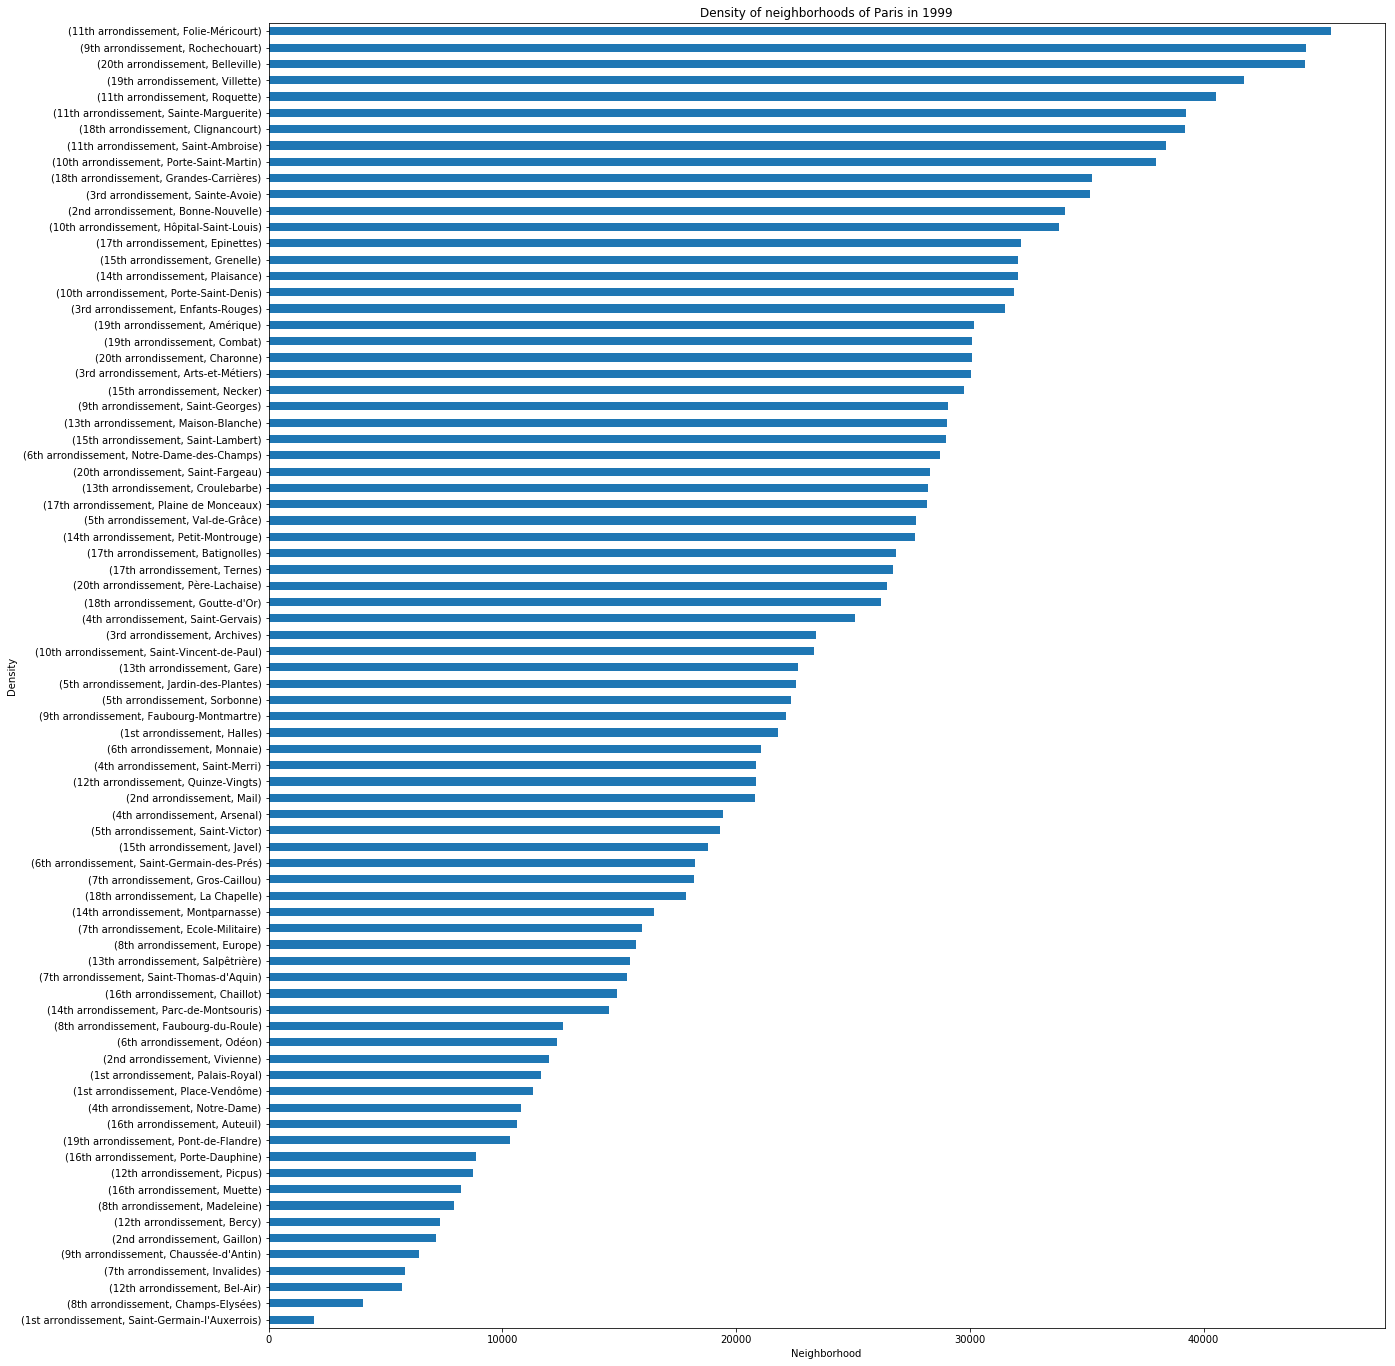

In [28]:
bar_chart_neighborhood_df.plot(kind='barh', figsize=(20, 24))

plt.xlabel('Neighborhood')
plt.ylabel('Density')
plt.title('Density of neighborhoods of Paris in 1999')
plt.legend().remove()

plt.show()

In [29]:
bar_chart_district_df = bar_chart_df.groupby('District').sum()
bar_chart_district_df['Density'] = bar_chart_district_df['Population'] / bar_chart_district_df['Area']
bar_chart_district_df = bar_chart_district_df[['Density']].sort_values(by=['Density'], ascending=True)

bar_chart_district_df.head()

,Density
District,
12th arrondissement,8376.574893
1st arrondissement,9259.499113
16th arrondissement,9883.439126
8th arrondissement,10129.543710
7th arrondissement,13933.301305


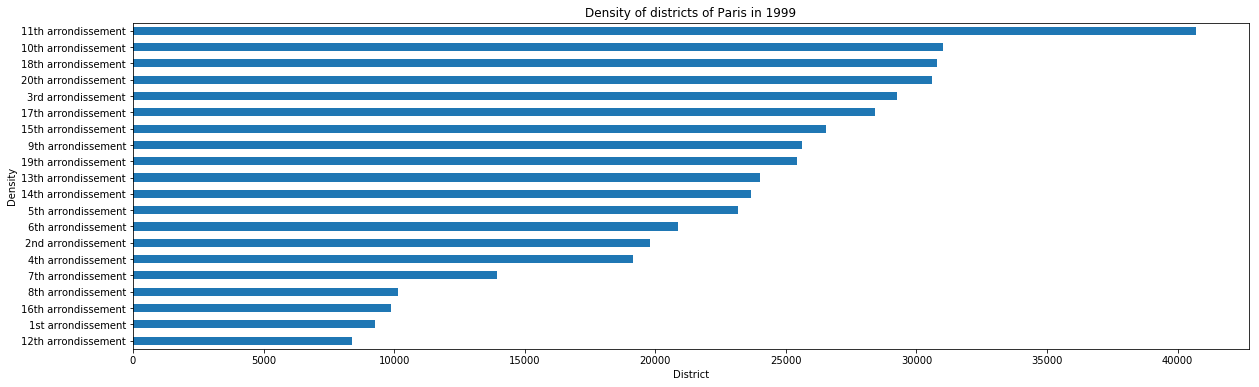

In [30]:
bar_chart_district_df.plot(kind='barh', figsize=(20, 6))

plt.xlabel('District')
plt.ylabel('Density')
plt.title('Density of districts of Paris in 1999')
plt.legend().remove()

plt.show()

## Analyse the localisation of seafood restaurants

In [31]:
# The code was removed by Watson Studio for sharing.

In [32]:
CATEGORY = '4bf58dd8d48988d1ce941735' #category for seafood restaurants, see https://developer.foursquare.com/docs/build-with-foursquare/categories/
RADIUS = 500
LIMIT = 100

def get_venues(latitude, longitude, category=CATEGORY, radius=RADIUS, limit=LIMIT):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude,
            category,
            radius, 
            limit)

    results = requests.get(url).json()
    venues_raw = results["response"]['groups'][0]['items']
    
    venues = []
    for venue in venues_raw:
        try:
            venue_id = venue['venue']['id']
            venue_name = venue['venue']['name']
            venue_latitude = venue['venue']['location']['lat']
            venue_longitude = venue['venue']['location']['lng']
            venues.append([venue_id,venue_name,venue_latitude,venue_longitude])
        except KeyError:
            pass
    
    columns = ['Venue_id', 'VenueName', 'VenueLatitude', 'VenueLongitude']
    
    df = pd.DataFrame(venues,columns=columns)
    return df

In [33]:
FROM_FOURSQUARE = False

if FROM_FOURSQUARE:
    seafood_restaurants_paris = pd.DataFrame(columns=['NeighborhoodCode', 'NeighborhoodNumber', 'Neighborhood', 'DistrictNumber', 'Venue_id', 'VenueName', 'VenueLatitude', 'VenueLongitude'])
    for id, neighborhood in paris_neighborhoods.iterrows():
        venues = get_venues(neighborhood['Latitude'], neighborhood['Longitude'])
        venues['DistrictNumber'] = neighborhood['DistrictNumber']
        venues['Neighborhood'] = neighborhood['Neighborhood']
        venues['NeighborhoodNumber'] = neighborhood['NeighborhoodNumber']
        venues['NeighborhoodCode'] = neighborhood['NeighborhoodCode']
        seafood_restaurants_paris = pd.concat([seafood_restaurants_paris, venues], ignore_index=True, sort=False)
    seafood_restaurants_paris.to_csv (r'seafood_restaurants_paris.csv', index = False, header=True)
else:
    seafood_restaurants_paris = pd.read_csv('seafood_restaurants_paris.csv')
       
seafood_restaurants_paris.head()

,NeighborhoodCode,NeighborhoodNumber,Neighborhood,DistrictNumber,Venue_id,VenueName,VenueLatitude,VenueLongitude
0,7510601,21,Monnaie,6,56b5ba26498e6f4bddd43f39,Huguette,48.853275,2.337111
1,7510601,21,Monnaie,6,56a761bd498e4801a8e214da,L'Avant Comptoir de la Mer,48.852179,2.338600
2,7510601,21,Monnaie,6,4adcda14f964a5203e3721e3,Fish La Boissonnerie,48.854193,2.337029
3,7510601,21,Monnaie,6,4adcda14f964a5204a3721e3,Huîtrerie Régis,48.852787,2.335831
4,7510601,21,Monnaie,6,577aa48c38fad73635678a7f,Les Pinces,48.854055,2.338363


In [34]:
seafood_restaurants_paris.dtypes

NeighborhoodCode        int64
NeighborhoodNumber      int64
Neighborhood           object
DistrictNumber          int64
Venue_id               object
VenueName              object
VenueLatitude         float64
VenueLongitude        float64
dtype: object